In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn

In [4]:
train=pd.read_csv('/content/drive/MyDrive/r_train.csv')
test=pd.read_csv('/content/drive/MyDrive/r_test.csv')
sub=pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set_style("darkgrid")

Train 데이터 불균형하게 만들기
--

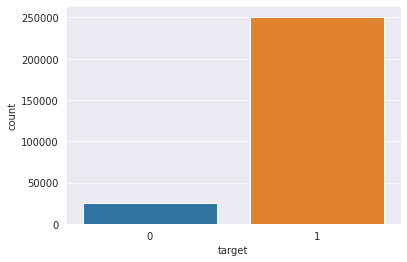

In [6]:
tn_0=train.loc[train['target']==0]
tn_1=train.loc[train['target']==1]
tn_0_tn, tn_00=train_test_split(tn_0, test_size=0.1, random_state=42)
tn_00=tn_00.reset_index()
tn_1=tn_1.reset_index()
tn=pd.concat([tn_1, tn_00], axis=0)
tn=tn.sort_values('index', ascending=True)
tn.drop('index', axis=1, inplace=True)
sns.countplot(tn['target'])
sns.set_style("darkgrid")

([<matplotlib.patches.Wedge at 0x7f30b94067d0>,
 [Text(-0.48874356889111664, -0.9854591436825652, 'target_0'),
  Text(0.4887435919574526, 0.985459132242696, 'target_1')],
 [Text(-0.2665874012133363, -0.5375231692813991, '9.1%'),
  Text(0.2665874137949741, 0.5375231630414705, '90.9%')])

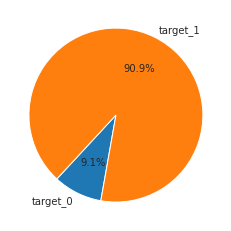

In [7]:
zero=len(tn.loc[tn['target']==0].index)
one=len(tn.loc[tn['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

- target_1 90%, target_0 10% 정도로 설정


In [8]:
x_train=tn.drop('target', axis=1)
y_train=tn['target']

In [9]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_clf', SVC(kernel='rbf'))
])

In [ ]:
rbf_kernel_svm_clf.fit(x_train, y_train)

In [ ]:
y_pred=rbf_kernel_svm_clf.predict(x_train)
print("f1_score", f1_score(y_train, y_pred))

f1_score 0.9523330441665828


In [ ]:
confusion_matrix(y_train, y_pred)

array([[     0,  25111],
       [     0, 250845]])

In [ ]:
auc_roc=classification_report(y_train, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     25111
           1       0.91      1.00      0.95    250845

    accuracy                           0.91    275956
   macro avg       0.45      0.50      0.48    275956
weighted avg       0.83      0.91      0.87    275956



In [ ]:
pred=rbf_kernel_svm_clf.predict(test)

In [ ]:
df_pred=pd.DataFrame(pred)

In [ ]:
df_pred=pd.DataFrame(pred, columns=['target'])

In [ ]:
sub.drop("target", axis=1, inplace=True)

In [ ]:
sub_rbf=pd.concat([sub, df_pred], axis=1)

In [ ]:
sub_rbf

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


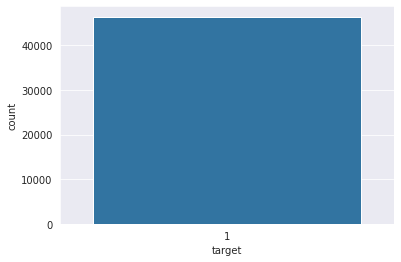

In [ ]:
import seaborn as sns

sns.countplot(sub_rbf['target'])

In [ ]:
sub_rbf.to_csv("sub_rbf.csv", index=False)